In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [2]:
df = pd.read_csv('../Merged_Fundamentals_and_Polls/merged_df_final.csv', index_col=0)

In [3]:
df.at[2, 'Month_8'] = 52.5
df.at[3, 'Month_8'] = 41.75
df.at[0, 'Month_11'] = 48
df.at[1, 'Month_11'] = 52

For the sake of visualization, the first thing we are going to do is to transform these several columns that gather data across different years into a weighted sum of improvements over the years, with more importance as we are getting closer to election year.

##### Net Approval Ratings, Payroll, Stock, Rdi, Election, Polls, Gdp

In [4]:
df['NAP'] = 1*(df['NAP07']-df['NAP06'])/df['NAP06']  + 2*(df['NAP08']-df['NAP07'])/df['NAP07'] + 3*(df['NAP09']-df['NAP08'])/df['NAP08'] + 4*(df['NAP10']-df['NAP09'])/df['NAP09']
df.drop(['NAP06', 'NAP07', 'NAP08', 'NAP09', 'NAP10'], axis=1, inplace=True)
df['payroll'] = 1*(df['payroll_y2']-df['payroll_y1'])/df['payroll_y1'] + 2*(df['payroll_y3']-df['payroll_y2'])/df['payroll_y2'] + 3*(df['payroll_ey1']-df['payroll_y3'])/df['payroll_y3'] + 4*(df['payroll_ey2']-df['payroll_ey1'])/df['payroll_ey1'] + 5*(df['payroll_ey3']-df['payroll_ey2'])/df['payroll_ey2']
df.drop(['payroll_y1', 'payroll_y2', 'payroll_y3', 'payroll_ey1', 'payroll_ey2', 'payroll_ey3'], axis=1, inplace=True)
df['stock'] = 1*(df['Stock_y2']-df['Stock_y1'])/df['Stock_y1'] + 2*(df['Stock_y3']-df['Stock_y2'])/df['Stock_y2'] + 3*(df['Stock_ey']-df['Stock_y3'])/df['Stock_y3']
df.drop(['Stock_y1', 'Stock_y2','Stock_y3','Stock_ey'], axis=1, inplace=True)
df['rdi'] = 1*(df['rdi_y1']-df['rdi_y0'])/df['rdi_y0'] + 2*(df['rdi_y2']-df['rdi_y1'])/df['rdi_y1'] + 3*(df['rdi_ey']-df['rdi_y2'])/df['rdi_y2']
df.drop(['rdi_y1', 'rdi_y2', 'rdi_y0', 'rdi_ey'], axis=1, inplace=True)
df['election'] = 1*(df['Electiony2']-df['Electiony1'])/df['Electiony1'] + 2*(df['Electiony3']-df['Electiony2'])/df['Electiony2'] + 3*(df['Electiony4']-df['Electiony3'])/df['Electiony3']
df.drop(['Electiony1', 'Electiony2', 'Electiony3', 'Electiony4'], axis=1, inplace=True)
df['national_polls'] = 1*(df['Month_7']-df['Month_6'])/df['Month_6'] + 2*(df['Month_8']-df['Month_7'])/df['Month_7'] + 3*(df['Month_9']-df['Month_8'])/df['Month_8'] + 4*(df['Month_10']-df['Month_9'])/df['Month_9'] + 5*(df['Month_11']-df['Month_10'])/df['Month_10']
df.drop(['Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11'], axis=1, inplace=True)
df['gdp'] = 1*(df['Year1']-df['Year0'])/df['Year0'] +2*(df['Year2']-df['Year1'])/df['Year1']
df.drop(['Year0', 'Year1', 'Year2'], axis=1, inplace=True)
df.drop(['President_winning'], axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop(['Year', 'Date'], axis=1, inplace=True)
df.drop('El_winner', axis=1, inplace=True)
df.drop('Early_Stopping_Previous', axis=1, inplace=True)
df.drop('popular_votes', axis=1, inplace=True)
df['state_election'] = -1*df['2nd_Mandate_Prev_Pres'] + 1*df['Current_President_Seeking_Reelection']
df.drop(['2nd_Mandate_Prev_Pres', 'Current_President_Seeking_Reelection'], axis=1, inplace=True)
df.drop('Winner', axis=1, inplace=True)
order= list(df.columns)[1:] + [list(df.columns)[0]]
print(order)
df = df[order]
df

['popular_vote_percentage', 'NAP', 'payroll', 'stock', 'rdi', 'election', 'national_polls', 'gdp', 'state_election', 'Democrat_Republican']


,popular_vote_percentage,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican
0,49.55,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1
1,45.07,0.825641,0.234242,-9.718823,-1.423503,0.031317,0.377789,-0.089281,0.0,0
2,55.18,-0.310126,0.261147,-1.243207,9.327366,0.115117,-0.339976,0.243113,-1.0,0
3,44.33,-0.310126,0.261147,-1.243207,9.327366,0.115117,0.145107,0.243113,-1.0,1
4,57.37,0.277996,0.160302,-16.387651,6.012349,0.055845,0.396180,0.158822,1.0,0
5,41.97,0.277996,0.160302,-16.387651,6.012349,0.055845,0.134840,0.158822,1.0,1
6,49.72,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.293195,0.118448,-1.0,1
7,49.55,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.272868,0.118448,-1.0,0
8,61.05,-0.057952,0.152195,-7.151825,2.556284,0.051400,-0.098125,0.146235,1.0,1
9,38.47,-0.057952,0.152195,-7.151825,2.556284,0.051400,1.700435,0.146235,1.0,0


In [5]:
# df.to_csv('../Merged_Fundamentals_and_Polls/Remastered_df_10pred.csv')

##### Preliminary EDA

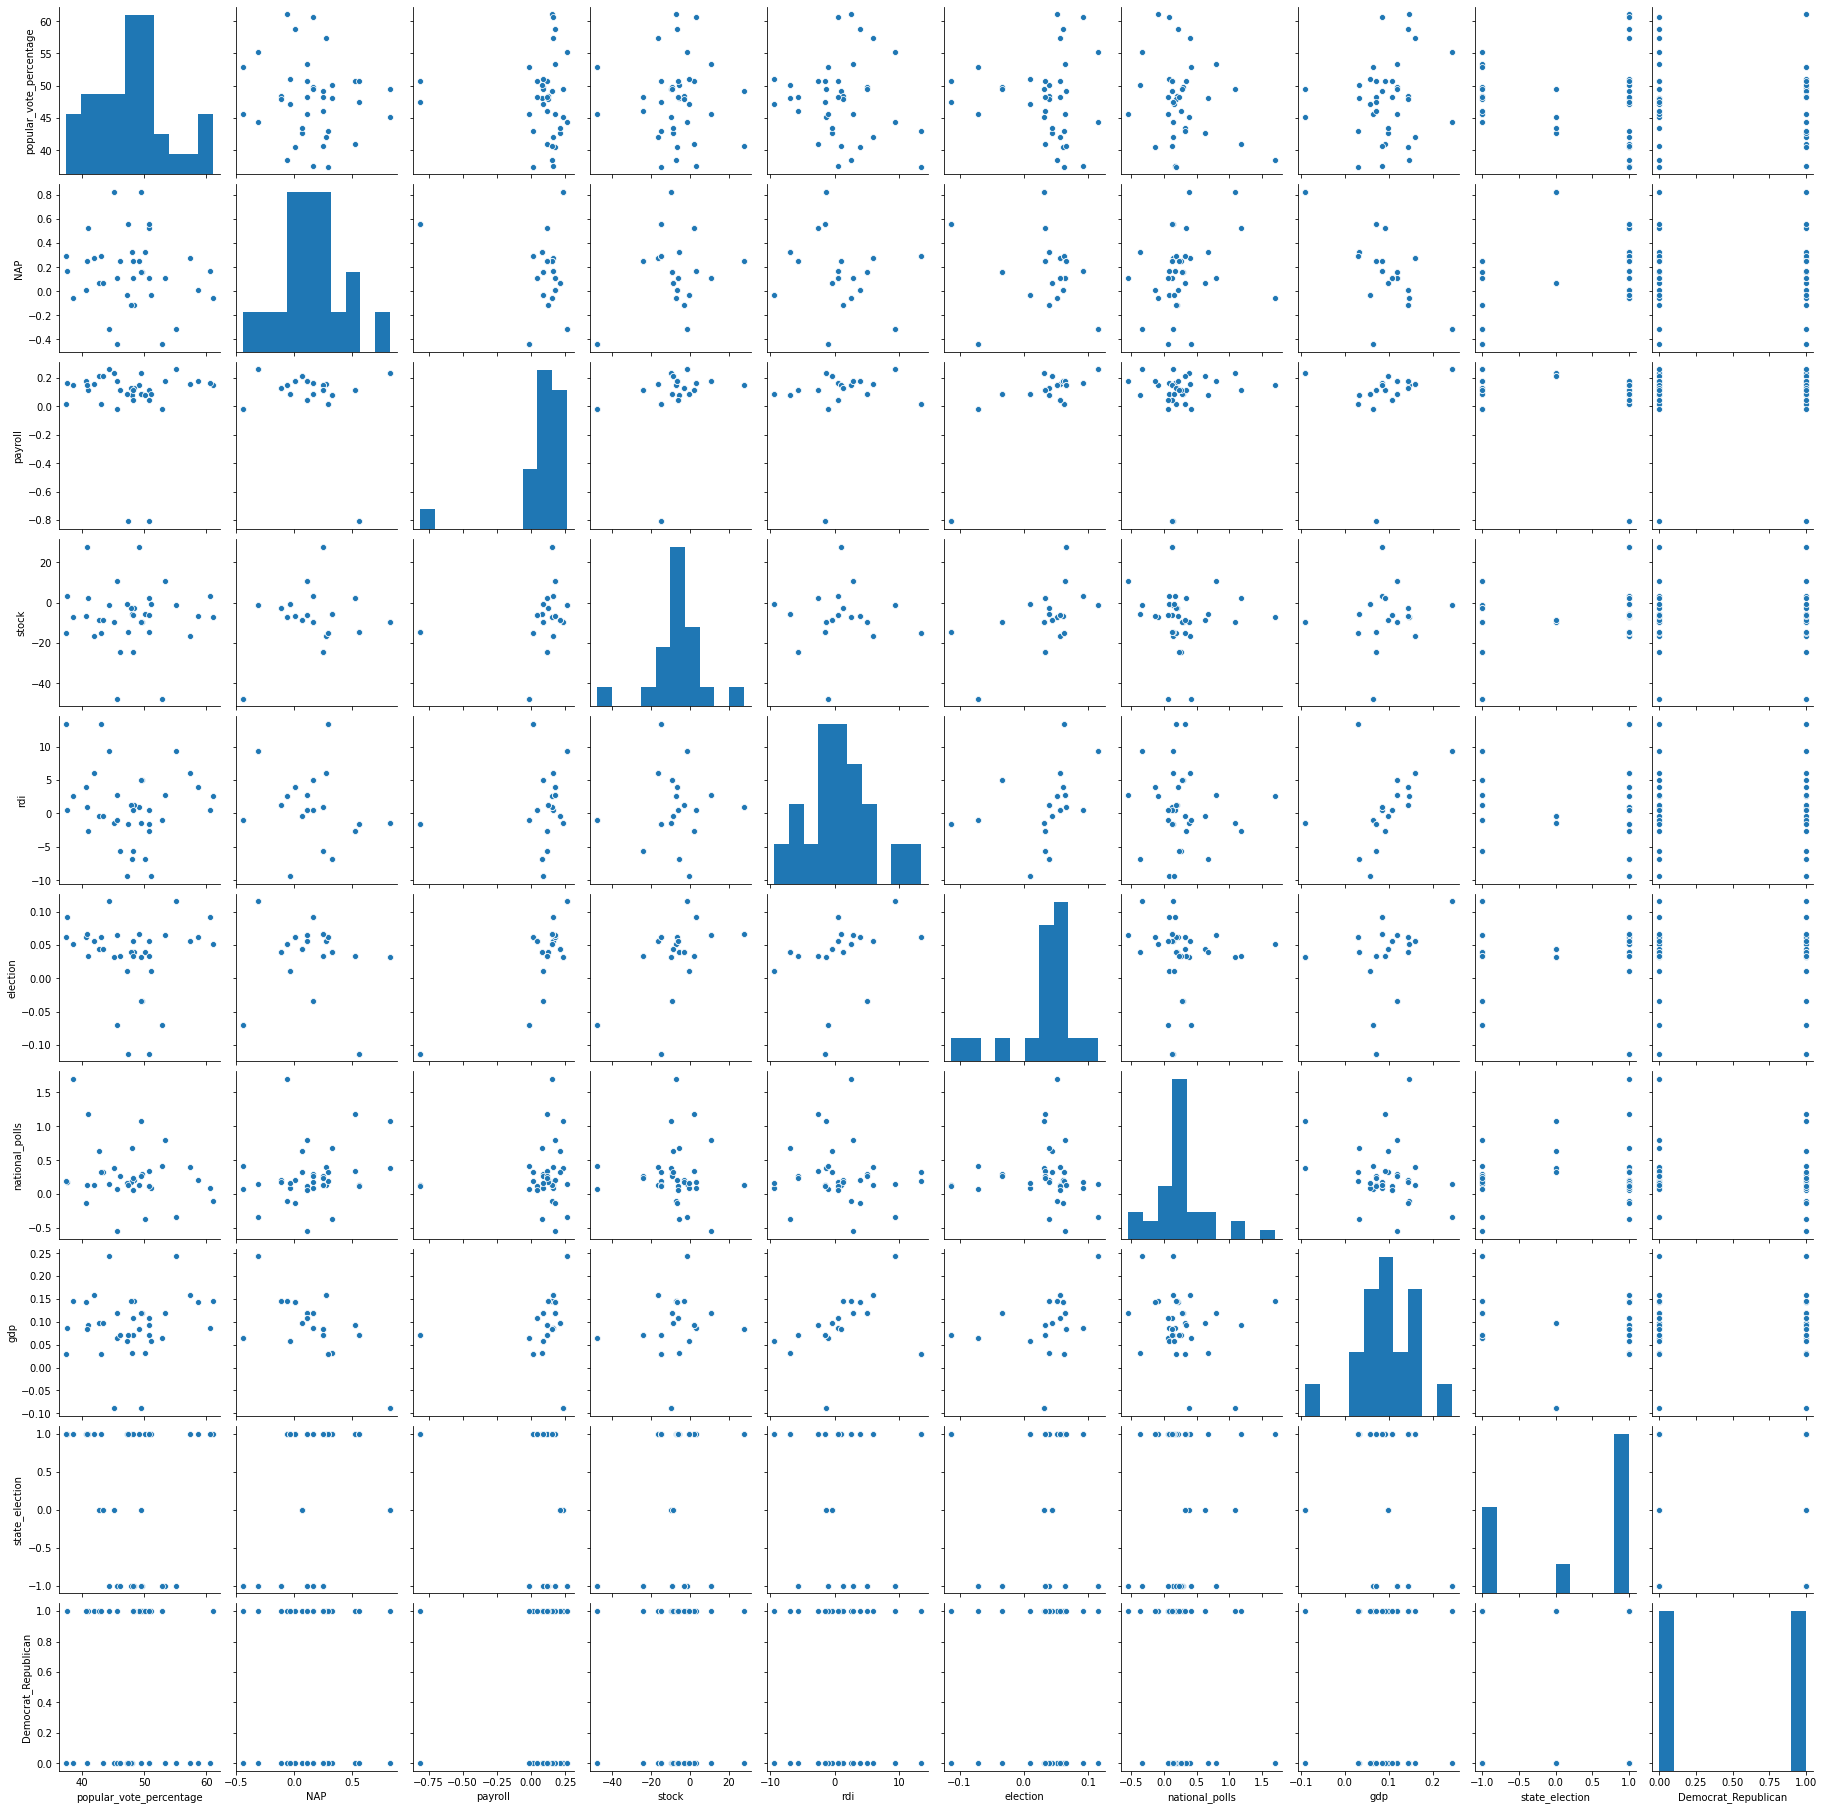

In [8]:
sns.pairplot(df)